# Trabalho Prático 01 - ALINHAMENTO DE SEQUÊNCIAS 

### Grupo:
* Alessandra Gomes Cioletti 2020730930
* Breno de Castro Pimenta 2017114809
* Daniel Victor Ferreira da Silva 2019006523
* Larissa Aline Fenandes Vieira 2019006868
* Vitor Pimentel dos Santos 2019021840


## Implemtação Needleman-Wunsch

### Matriz:
Inicialmente geramos uma matriz utilizando duas sequências de entrada, uma sequência A para as linhas e uma sequência B para as colunas, além do valor absoluto da penalida do indel (gaps).<br>
Inicia-se o preenchimento a partir da primeira linha e coluna, onde são preenchidas com a subtração sucessiva do valor do indel.<br>
Em seguida preenche-se o resto da matriz obedecendo a seguinte lógica, dividimos as penalidades entre matches/mismatches e indels:
* **matches/mismatches**: utilizamos a a matriz *blosum62*, ou seja, verificamos os aminoácidos da coluna e linha da matriz e obtemos uma pontuação.
* **indels**: como explicado anteriormente, subtrai-se o valor específicado.

A partir dessas penalidades, para calcular o valor de uma célula comparamos o valor da célula na diagonal superior esquerda somada ao valor da blosum com os valores das células superior e à esquerda somados ao indel, atribuindo o maior valor à célula analizada. <br>Junto a este valor armazenamos na matriz um símbolo a cada célula para representar de onde veio o maior valor armazenado, o qual vamos utilizar ao final do processo para gerar o alinhamento.
<br><br>

### Alinhamento:
Para gerar o alinhamento partimos do sumidouro e percorremos a matriz em direção a origem percorrendo o caminho sinzalizado em cada célula. Realizamos as seguintes operações de acordo com o símbolo:<br>

* "\\": Deve registrar no início do alinhamento B (coluna) o aminoácido da sequência B na posição atual e no início do alinhamento A (linha) o aminoácido da sequência A na posição atual.

* "\-" : Deve registrar no início do alinhamento B (coluna) o aminoácido da sequência B na posição atual e no início do alinhamento A é registrado o símbolo de gap.

* "|" : Deve registrar no início do alinhamento A (linha) o aminoácido da sequência A na posição atual e no início do alinhamento B é registrado o símbolo de gap.

Ao chegar na origem da matriz obtemos os dois alinhamentos pelo método de Needleman-Wunsch para as duas sequências de entrada.
<br>
<br>

### Visualização:
A visualização foi feita com o auxílio da biblioteca [dash-bio do plotly](https://dash.plotly.com/dash-bio), com o qual geramos como saída uma extensão html com a visualização dos alinhamentos por partes.




# Código:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install dash
!pip install dash_bio

In [ ]:
from requests import get

import dash
import dash_bio as dashbio
import dash_html_components as html
#from Bio.Blast.Applications import NcbiblastxCommandline

from IPython.display import Image

### Buscando blosum como arquivo local:

In [ ]:
blosum = pd.read_csv('blosum62',delim_whitespace=True,skiprows=6)
blosum

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,...,-1,0,-1,-2,-1,-2,0,3,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,...,-1,0,-1,-3,-2,-2,1,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,...,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,...,-2,-1,-2,-2,2,-3,0,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,...,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


### Lendo sequências dentro do arquivo fasta:

In [ ]:
def read_seq(file):
    with open(file,'r') as fopen:
        sequencias = []
        cabecalho = []
        sequencia = ''
        for line in fopen:
            if(line[0] !='>'):
                sequencia = sequencia + line[:-1]
            else:
                cabecalho.append(line)
                sequencias.append(sequencia)
                sequencia = ''
        sequencias.append(sequencia)
    return sequencias[1:],cabecalho

def list_chars(sequencias):
    '''
    Adiciona asterisco no início de cada sequência
    '''
    for idx,val in enumerate(sequencias):
        sequencias[idx] = ['*']+list(val)
    return sequencias

### Gerando a matriz:

In [ ]:
def matriz_NW(a,b,M,indel):
    '''
    Preenche a matriz utilizando
    os valores da blosum e do indel.
    '''
    if indel>0:
        M.iloc[0] = tuple(zip(np.arange(0,-len(b)*indel,-indel),["_"]*len(b)))
        M["*"] = tuple(zip(np.arange(0,-len(a)*indel,-indel),["|"]*len(a)))
    else:
        M.iloc[0] = tuple(zip(np.zeros(len(b),dtype=int),["_"]*len(b)))
        M["*"] = tuple(zip(np.zeros(len(a),dtype=int),["|"]*len(a)))
    M.iloc[0].iloc[0] = (0,"")
    for idxi in range(1,len(a)):
        for idxj in range(1,len(b)):
            diag = M.iloc[idxi-1].iloc[idxj-1][0]+ blosum[b[idxj]][a[idxi]]
            if a[idxi]!=b[idxj]:
                cima = M.iloc[idxi-1].iloc[idxj][0]-indel
                esq = M.iloc[idxi].iloc[idxj-1][0]-indel
                if diag>=cima:
                    if diag>=esq:
                        maior = diag
                        sinal = "\\"
                    else :
                        maior = esq
                        sinal = "_"
                elif cima>=esq:
                    maior = cima
                    sinal = "|"
                else:
                    maior = esq
                    sinal = "_"
            else:
                maior = diag
                sinal = "\\"
            M.iloc[idxi].iloc[idxj] = (maior,sinal)
    return M

### Gerando alinhamentos:

In [ ]:
def alinhamentos(a,b,M):
    '''
    Percorre a matriz gerando
    o alinhamento para cada 
    sequência.
    '''
    al_a = ""
    al_b = ""
    pos_linha = -1
    pos_coluna = -1
    valor, sinal = M.iloc[pos_linha].iloc[pos_coluna] # M.iloc[posicaolinha].iloc[posicaocoluna]
    while sinal!="":
        if sinal == '\\':
            al_a = a[pos_linha] + al_a
            al_b = b[pos_coluna] + al_b
            pos_linha = pos_linha -1
            pos_coluna = pos_coluna -1
        elif sinal == '|':
            al_a = a[pos_linha] + al_a
            al_b = "-" + al_b
            pos_linha = pos_linha - 1
        elif sinal == '_':
            al_a = "-" + al_a
            al_b = b[pos_coluna] + al_b
            pos_coluna = pos_coluna -1
        valor, sinal = M.iloc[pos_linha].iloc[pos_coluna]
    return al_a,al_b

### Escreve os alinhamentos no arquivo fasta:

In [ ]:
def write_alinhamentos(file,alms,cabecalho):
    '''
    Escreve os alinhamentos resultantes
    no arquivo fasta.
    '''
    arquivo = open(file, 'w')
    for pos,alm in enumerate(alms):
        arquivo.write(cabecalho[pos])
        ls = np.arange(0,len(alm)+1,60)
        i = 0
        for f in ls[1:]:
            arquivo.write(alm[i:f]+"\n")
            i = f
        arquivo.write(alm[i:]+"\n")
    arquivo.close()

### Gera visualização do alinhamento:

In [ ]:
def plot(file):
    plot = dash.Dash()

    data = open(file, 'r').read()

    plot.layout = html.Div([
      dashbio.AlignmentChart(
          id='my-alignment-viewer',
          data=data,
          showconsensus=False,
          textsize = 14,
          height = 550,
          tilewidth = 20,
      ),
      html.Div(id='alignment-viewer-output')
    ])

    @plot.callback(
      dash.dependencies.Output('alignment-viewer-output', 'children'),
      [dash.dependencies.Input('my-alignment-viewer', 'eventDatum')]
    )
    def update_output(value):
        if value is None:
            return 'No data.'
        return str(value)


    plot.run_server(host = 'localhost',debug=False)

## Exemplos da descrição do TP:

In [ ]:
#Examplo 01

A = "DRQT"
B = "DRQT"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,0)
alinhamento = alinhamentos(A,B,matriz)
print(alinhamento[0])
print(alinhamento[1])
print()
matriz

        *       D        R        Q        T
*   (0, )  (0, _)   (0, _)   (0, _)   (0, _)
D  (0, |)  (6, \)   (6, _)   (6, _)   (6, _)
R  (0, |)  (6, |)  (11, \)  (11, _)  (11, _)
Q  (0, |)  (6, |)  (11, |)  (16, \)  (16, _)
T  (0, |)  (6, |)  (11, |)  (16, |)  (21, \)

DRQT
DRQT


In [ ]:
#Examplo 02

A = "DRQT"
B = "DRET"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,0)
alinhamento = alinhamentos(A,B,matriz)
print(alinhamento[0])
print(alinhamento[1])
print()
matriz

        *       D        R        E        T
*   (0, )  (0, _)   (0, _)   (0, _)   (0, _)
D  (0, |)  (6, \)   (6, _)   (6, _)   (6, _)
R  (0, |)  (6, |)  (11, \)  (11, _)  (11, _)
Q  (0, |)  (6, |)  (11, |)  (13, \)  (13, _)
T  (0, |)  (6, |)  (11, |)  (13, |)  (18, \)

DRQT
DRET


In [1]:
#Examplo 03

A = "DRQTAQAAGTTTIT"
B = "DRNTAQLLGTDTT"
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,0)
alinhamento = alinhamentos(A,B,matriz)
print(alinhamento[0])
print(alinhamento[1])
print()
matriz

NameError: ignored

## Exemplos utilizando sequências do arquivo de entrada:
Decidimos usar como sequência base para os alinhamentos a terceira sequência do arquivo referente ao SARS2. 

Lendo sequências do arquivo fasta:





In [ ]:
sequencias,cabecalho = read_seq('sequencias_spike.fasta')
sequencias = list_chars(sequencias)

O primeiro exemplo é o alinhamento da SARS2 com CVMJC (Murine coronavirus), utilizando o indel = 5:

In [ ]:
A = sequencias[0]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,5)
alinhamento = alinhamentos(A,B,matriz)
write_alinhamentos('alinhamentos02.fasta',alinhamento,[cabecalho[0],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MLFVFILFLPSCLGYIGDFRCIQTVNYNGNNASAPSISTEAVDVSKGLGTYYVLDRVYLNATLLLT-G-YYP-VDGSN-YRNLALTGTNTLSLTWFKPPFLSEFNDGI-FAKVQNLKTNTPTGATSYFPTIVIGSLFGNTSYTVVLEPYNNIIMASVCTYTICQLPYTPC---KPN-T--NGN-RVIGFW-H-T-D-VKPPICL-L--KR-NF-TF-N-V--NAPWLYFHFYQQGGTFYAYYADKP---SATTFLFSVYIG-DILT-Q-YFVL-PFICTP---TAGSTL-LPLYWVTPLLKRQYLFNFNEKGVITSAVDCASSYISEIKCKTQSLLPSTGVYDLSGYTVQPVGVVYRRVPNLPD-CKIEEWLTAKSVPSPLNWERRTFQNCNFNLSSLLRYVQAESLSCNNIDASKVYGMCFGSVSVDKFAIPRSRQIDLQIGNSGFLQTANYKIDTAATSCQLYYSLPKNNVTINNYNPSSWNRRYGFNDAGVFGKSKHDVAYAQQCFIVRPSYCPCAQPDIVSACTSQTKPMSAYCPTGTIHRECSLWNGPHLRSARVGSGTYTCECTCKPNPFDTYDLRCGQIKTIVNVGDHCEGLGVLEDKCGNSDPHKGCSCAHDSFIGWSHDTCLVNDHSQIFANILLNGINSGTTCSTDLQLPNTEVATGVCVRYDLYGITGQGVFKEVKADYYNSWQAL-LYDVNG-NLNGFRDLTTNKTYTIRSCYSGRVSAAYHK-EAPE-PALLYRNINCSYVFTNNISREENPLNYFDSYLGCVVNADNRPDEALPNCDLRMGAGLCVDY-SKSRRARRSVSTGYRLTTFEPY-MPMLVNDSVQSVGGLYEMQIPTNFTIGHHEEFIQIRAPKVTIDCAAFVCGDNAACRQQLVEYGSFCDNVNAILNEVNNLLD-NMQLQVASALMQGVTISSRLPDGISGPIDDINFSPLLGCIGSTCAEDGNGPSAMRGRSAIEDLLFDKVKLSDVGFVEAYNNCTGGQEVRDLL

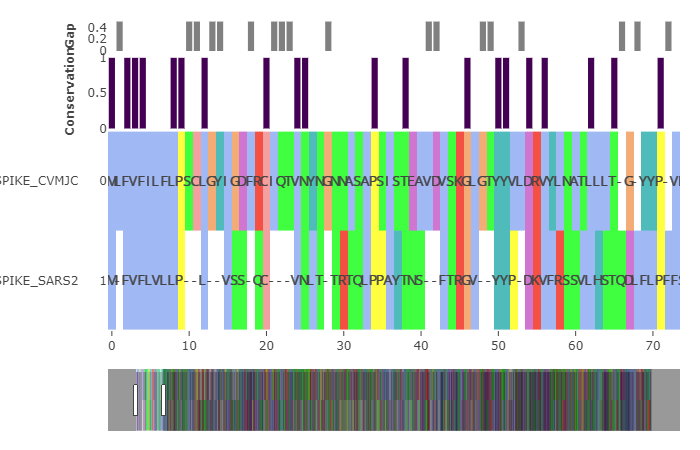

In [ ]:
#plot('alinhamentos02.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (1).png")  # amostra da visualização

O segundo exemplo é o alinhamento da SARS2 com MERS (Middle East respiratory syndrome-related coronavirus), utilizando o indel = 0:

In [ ]:
A = sequencias[1]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,0)
alinhamento = alinhamentos(A,B,matriz)
write_alinhamentos('alinhamentos12.fasta',alinhamento,[cabecalho[1],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MIHSVFLLMFLLTPTESYVDVGPDSVKS-ACIEVDI-QQTFFDKT--WPRP---IDVS--KADGI-IYP-Q--GRTYSNITI--TYQ-GLF-P-YQGD----HGDMYVYSAGHAT-GT----TP-QKL-FVANYSQD-V-KQFA-----NGFVVR--I-GAAANSTGTVI-ISPST-SATIRKIYPAFMLGSSVGNFSDGKMGRFFN-HT-LVL-LPDGCGTLLRAF-YCILEPRSGN-HCP--AG-NSYTSFATYHTPATDCSDGNYNRNAS-LNS-FK-EY---FNLRNCTF-MY-T--YNI-TEDEILEWFGITQTAQGVHLF-S-SR-YV----D----LY------GGN----M-FQ-F-ATL-P-VYD-------TIKY-YS-I-IPHSIRS-IQS--D-RKA-W----AAFYV-YKLQP-LTFLL-DFSVD-G-YI--RRAIDCGFND-LSQ--LHCS-YESF-DVESGVY-SVSSF--EAKPS-GSVVEQ--AEGV---ECDFSPLLSG-----TPPQ---VY--N-FKRLVFTNC--NYNLTKLLS-LFSVN--DF-T--C-SQISP--AAIASN--CYSSLILDY--FSYPLSMKSD-L-SVSSAGP-----ISQFNYKQSFSNP---T-CLILA--TVPHNL-TTITKPL--KYS--Y-I----N-K--CSRLLSD-DRTEV-PQLVNANQYS-PCVSIVPSTVWEDG-D-YYRKQLSPLE--G-----G-G---W-LVASGSTVAMT-EQLQMGFGITVQY--GTDTNSVC-PKLEFA-N-DTKIASQLGN-CVEYSLY-GVSG-RGV--FQ-N-CTAVGVR----QQRF---V----YDA----YQNL-V-GYYSDDGNYYCL--RACVS---VPVSVIYDKET--KTHATLFGS--VA-------C-E-----H---ISST-MSQYSRST-RSM-LKRRDSTYG--PL-QT-PVGCVL-G---LVNSSLFVEDC-KLPLGQS-LCA

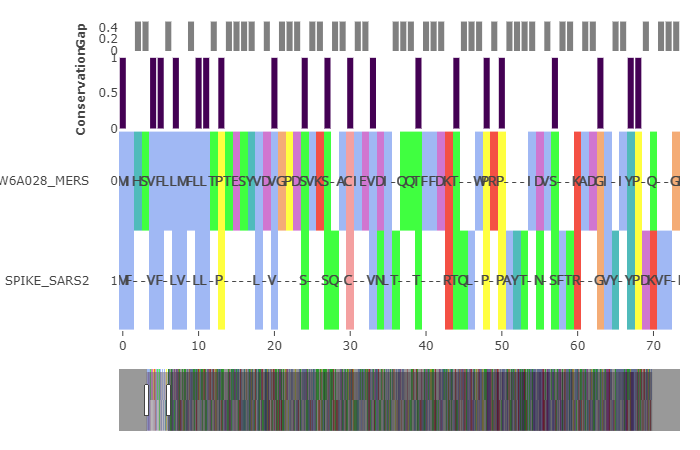

In [ ]:
#plot('alinhamentos12.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (2).png") # amostra da visualização

O terceiro exemplo é o alinhamento da SARS2 com SARS (Severe acute respiratory syndrome coronavirus), utilizando o indel = 5:

In [ ]:
A = sequencias[3]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,5)
alinhamento = alinhamentos(A,B,matriz)
write_alinhamentos('alinhamentos32.fasta',alinhamento,[cabecalho[3],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTI-----NHT--FGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAV--SK-PMG-TQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILT---AF-SPA-QDI-WGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCT-PPALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQDVNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASYHT-V-S--LLRSTSQKSIVAYTMSLGADSSIAYSNNTIAIPTNFSISITTEVMPVSMAKTSVDCNMYICGDSTECANLLLQYGSFCTQLNRALSGIAAEQDRNTREVFAQVKQMYKTPTLKYFGGFNFSQILPDPLKPTKRSFIEDLLFNKVTLADAGFMKQYGECLGDINARDLICAQKFNGLTVLPPLLTDDMIAAYTAALVSGTATAGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKQIANQFNKAISQIQESLTTTSTALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRL

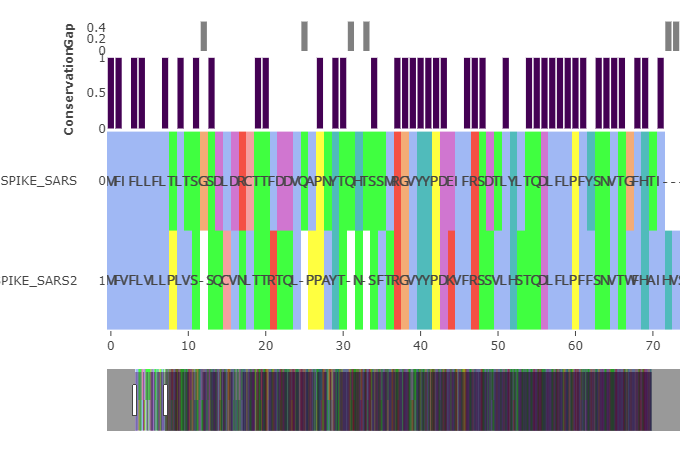

In [ ]:
#plot('alinhamentos32.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (3).png") # amostra da visualização

O quarto exemplo é o alinhamento da SARS2 com CVHOC (Human coronavirus OC43), utilizando o indel = 5:

In [ ]:
A = sequencias[6]
B = sequencias[2]
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,5)
alinhamento = alinhamentos(A,B,matriz)
write_alinhamentos('alinhamentos62.fasta',alinhamento,[cabecalho[6],cabecalho[2]])
print(alinhamento[0])
print()
print(alinhamento[1])

MFLILLISLPTAFAVIGDLKCTSDNINDKDTGPPPISTDTVDVTNGLGTYYVLDRVYLNTTLF-LNG-YYP-TSGST-YRNMALKGSVLLSRLWFKPPFLSDFINGI-FAKVKNTKVIKDRVMYSEFPAITIGSTFVNTSYSVVVQPRTINSTQD---G----DNKLQGL-LEVSV-CQYNMCEYPQTICHPNLGN-HRKELWHLDTGVVSCLYKRNFT-Y-DVNADYLYFHFYQE-GGTFYAY--FTD--TGV-VTKFLFNVYLGMALSHYYVMPLTCNSKLT---LEYWVTPLTSRQYLLAFNQDGIIFNAEDCMSDFMSEIKCKTQSIAPPTGVYELNGYTVQPIADVYRRKPNLPN-CNI-EAWLNDKSVPSPLNWERKTFSNCNFNMSSLMSFIQADSFTCNNIDAAKIYGMCFSSITIDKFAIPNGRKV-DLQLGNLGYLQSFNYRIDTTATSCQLYYNLPAANVSVSRFNPSTWNKRFGFIEDSVFKPRPAGVLTNHDVVYAQHCFKAPKNF-CPCKLNGSCVGSGPGKNNGIGTCPAGTNYLTCDNLCTPDPITFTGTYKCPQTKSLVGIGEHCSGLAVKSDYCGGNSCTCRPQAFLGWSADSCLQGDKCNIFANFILHDVNSGLTCSTD-LQKANTDIILGVCVNYDLYGILGQGIFVEVNATYYNSWQNLLYDSNGNLYGFRDYIINRTFMIRSCYSGRVSAAFHANSSEPALLFRNIKCNYVFNNSLTRQLQPINYFDSYLGCVVNAYNSTAISVQTCDLTVGSGYCVDYSKNRRS-RGAITTGYRFTNFEPFTVN-SVNDSLEPVGGLYEIQIPSEFTIGNMVEFIQTSSPKVTIDCAAFVCGDYAACKSQLVEYGSFCDNINAILTEVNELLD-TTQLQVANSLMNGVTLSTKLKDGVNFNVDDINFSPVLGCLGSECSKASSRSAIEDLLFDKVKLSDVGFVEAYNNCTGGAEIRDLICVQSYKGIKVLPPLLSENQISGYTLAAT

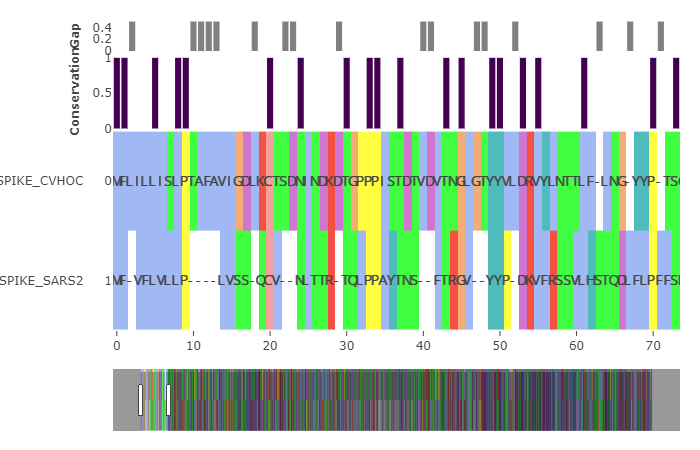

In [ ]:
#plot('alinhamentos62.fasta') # descomentar e executar para gerar link e visualizar o alinhamento
Image("newplot (4).png") # amostra da visualização

### Para teste do avaliador:


In [ ]:
# ENTRAR VALORES PARA REALIZAR O ALINHAMENTO:
nome_arquivo_origem = ""
nome_arquivo_resultado = ""
indel = 0

#chamada das funções:
sequencias,cabecalho = read_seq(nome_arquivo_origem)
sequencias = list_chars(sequencias)
A = sequencias[0]
B = sequencias[1]
A,B = list_chars([A,B])
M = pd.DataFrame(index = A,columns = B)
matriz = matriz_NW(A,B,M,indel)
alms = alinhamentos(A,B,matriz)
cabecalhos = [cabecalho[0],cabecalho[1]]

#Armazenando arquivo resultado
write_alinhamentos(nome_arquivo_resultado,alms,cabecalhos)

#Plotando arquivo resultado
plot(nome_arquivo_resultado)